In [11]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Для распределения Бернулли известно:

$$\hat{\theta} - \theta = c(\theta) \frac{n}{\theta(1-\theta)} (\overline{X} - \theta)$$

$$i(\theta) = \frac{1}{\theta(1-\theta}$$

In [70]:
N = 1000
M = 500

#### Сетка значений

In [71]:
thetas_interval = np.arange(0, 1, 0.01)

### Оценки

In [75]:
low_estimation = np.zeros(len(thetas_interval)) # нижняя оценка
effective_estimation = np.zeros(len(thetas_interval)) # эффективная оценка
disp_estimation = np.zeros(len(thetas_interval)) # оценка дисперсии

In [76]:
for (i, theta) in [(i, thetas_interval[i]) for i in range(len(thetas_interval))]:
        low_estimation[i] = 1 / (N / theta / (1. - theta))
        sample = sps.bernoulli.rvs(theta, size = N) # выборка
        effective_estimation[i] = np.average(sample) # из формулы выше
        # бутстрепные оценки дисперсии
        disp_estimation[i] = sps.moment([np.average(
                    sps.bernoulli.rvs(effective_estimation[i], size = N)) 
                                         for j in range(M)], 2)
    

## График зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$

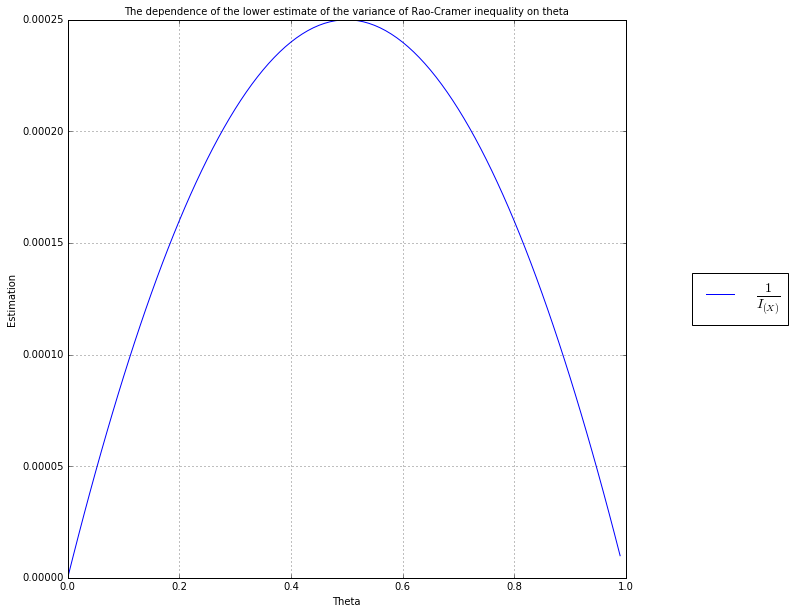

In [62]:
plt.figure(figsize=(10, 10))
plt.plot(thetas_interval, low_estimation, label ='$ \\frac{1}{I_{(X)}} $')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize = 20)
plt.title('The dependence of the lower estimate of the variance of Rao-Cramer inequality on theta', 
          fontsize = 10)
plt.xlabel('Theta')
plt.ylabel('Estimation')
plt.grid()

### Чем ближе $\theta$ к 0.5 тем хуже будет оценка $\theta$

### График зависимости полученных бутстрепных оценок от $\theta$

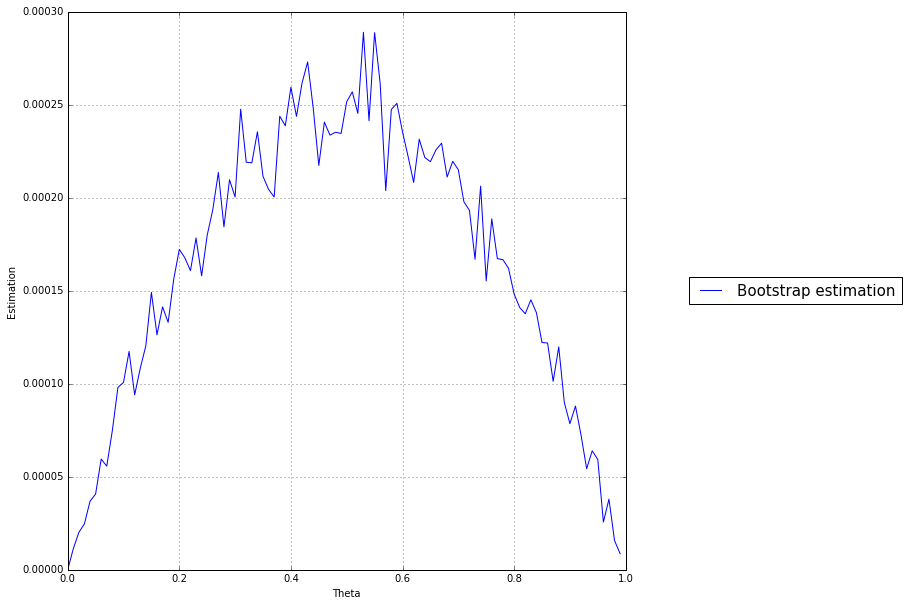

In [86]:
plt.figure(figsize=(10, 10))
plt.plot(thetas_interval, disp_estimation, label = 'Bootstrap estimation')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize = 15)
plt.xlabel('Theta')
plt.ylabel('Estimation')
plt.grid()

###  Чем ближе $\theta$ к 0.5 тем  больше бутстрепная дисперсия для оценки 